In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.feature_selection import f_classif,chi2
import pickle

In [2]:
data_dir="C:\\Users\\Arda\\Downloads\\football_master\\Documantation\\Datas\\"

In [3]:
#Finished match data selected
datamart= pd.read_csv("{}datamart.csv".format(data_dir))
datamart=datamart[datamart["fixture.status.short"]=="FT"]

In [4]:
datamart.columns[27:60]

Index(['Foul_Home', 'Corner_Kicks_Home', 'Offsides_Home',
       'Ball_Possession_Rate_Home', 'Yellow_Cards_Home', 'Red_Cards_Home',
       'Total_Passes_Home', 'Accurate_Pass_Rate_Home', 'Total_Shot_Home',
       'Shot_On_Goal_Rate_Home', 'Inside_Box_Shot_Rate_Home',
       'Total_Free_Shot_Home', 'trapped_offside_Home',
       'Pass_Forced_to_Fail_Home', 'Blocked_Shot_Rate_Home',
       'Total_Shot_Opp_Given_Home', 'İnside_Box_Shot_Opp_Given_Home',
       'Goal_Saved_Percentage_Home', '1st_Quarter_Normal Goal_Home',
       '4th_Quarter_Yellow Card_Home', '5th_Quarter_Yellow Card_Home',
       '6th_Quarter_Normal Goal_Home', '6th_Quarter_Yellow Card_Home',
       '2nd_Quarter_Normal Goal_Home', '3rd_Quarter_Yellow Card_Home',
       '1st_Quarter_Yellow Card_Home', '3rd_Quarter_Normal Goal_Home',
       '4th_Quarter_Normal Goal_Home', '2nd_Quarter_Yellow Card_Home',
       '3rd_Quarter_Red Card_Home', '5th_Quarter_Normal Goal_Home',
       '5th_Quarter_Red Card_Home', '6th_Quarter_Red 

In [5]:
#Columns to be check for home goals correlation
home_columns=["goals.home"]+[i for i in datamart.columns if i[-4:]=="Home"] +[i for i in datamart.columns if i[-4:]=="Away"]

In [6]:
dicted= {"Away":"Home","Home":"Away"}


In [7]:
#Columns to be check for away goals correlation
away_columns=["goals.away"]+[i for i in datamart.columns if i[-4:]=="Away"] +[i for i in datamart.columns if i[-4:]=="Home"]

#### HOME GOAL FEATURES DISTRUBITON

In [8]:
home_stats=datamart[home_columns]
#3 and more goals is  renamed, thus our object to predict over 2 goals
home_stats["goals.home"]=home_stats["goals.home"].apply(lambda x: "Over_2" if x>=3 else x).astype("str")
home_stats["goals.home"]

C:\Users\Arda\AppData\Local\Temp\ipykernel_19936\3887565935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_stats["goals.home"]=home_stats["goals.home"].apply(lambda x: "Over_2" if x>=3 else x).astype("str")


0           0.0
1           1.0
2           0.0
3           0.0
4        Over_2
          ...  
68657       2.0
68658       2.0
68659       1.0
68660       1.0
68661       2.0
Name: goals.home, Length: 68662, dtype: object

In [9]:
#For each home goal strata, colums mean calculated.
home_stats_v1=home_stats.groupby("goals.home",as_index=False)[home_columns[1:]].mean()
home_stats_v1

,goals.home,Foul_Home,Corner_Kicks_Home,Offsides_Home,Ball_Possession_Rate_Home,Yellow_Cards_Home,Red_Cards_Home,Total_Passes_Home,Accurate_Pass_Rate_Home,Total_Shot_Home,...,Rank_Name_last_2_3_Away,Rank_Name_title_Away,Rise_Need_1_point_needed_Away,Rise_Need_3_point_for_catch_Away,Rise_Need_3_point_for_chase_Away,Rise_Need_top_Away,Fall_Prevent_1_point_for_run_Away,Fall_Prevent_3_point_for_run_Away,Fall_Prevent_bottom_Away,Fall_Prevent_comfort_Away
0,0.0,12.410609,4.495348,1.667354,0.485727,2.025290,0.036718,402.434807,0.755886,11.570438,...,0.089672,0.070064,0.439428,0.362620,0.127888,0.070064,0.146559,0.544648,0.037779,0.271013
1,1.0,12.412933,4.643418,1.689220,0.493848,2.035730,0.036359,410.476361,0.762046,11.915321,...,0.108839,0.052531,0.445819,0.377746,0.123904,0.052531,0.146045,0.550187,0.048450,0.255318
2,2.0,12.272357,4.789180,1.716308,0.503738,1.994032,0.032628,421.297067,0.768386,12.338931,...,0.115516,0.038625,0.452528,0.383614,0.125232,0.038625,0.146584,0.545973,0.060517,0.246926
3,Over_2,11.949115,5.043505,1.752106,0.519874,1.927247,0.031219,441.860598,0.780808,13.042771,...,0.144116,0.024805,0.452361,0.390310,0.132525,0.024805,0.145584,0.528862,0.081369,0.244185


In [10]:
i=0

Foul_Home


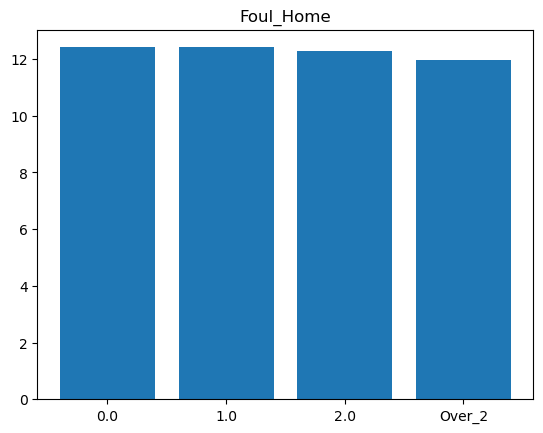

In [11]:
#By iterating through home columns, correlation between target and given column evaluated.

data=home_stats_v1[home_columns[1+i]]


plt.bar(home_stats_v1["goals.home"],data)
plt.title(home_columns[1+i])
print(home_columns[1+i])
i+=1


In [12]:
#Selected home columns are recorded here.
correlated_home_cols=["Corner_Kicks_Home","Ball_Possession_Rate_Home",
                      "Red_Cards_Home",
                      "Total_Passes_Home","Total_Shot_Home",
                      "Total_Free_Shot_Home",
                     '1st_Quarter_Normal Goal_Home',
                      '2nd_Quarter_Normal Goal_Home','3rd_Quarter_Normal Goal_Home',
                      '4th_Quarter_Normal Goal_Home','5th_Quarter_Normal Goal_Home',
                      '6th_Quarter_Normal Goal_Home',"Total_Shot_Opp_Given_Away",
                      "1st_Quarter_Conceived Goal_Away","2nd_Quarter_Conceived Goal_Away",
                      "3rd_Quarter_Conceived Goal_Away","4th_Quarter_Conceived Goal_Away",
                      "5th_Quarter_Conceived Goal_Away","6th_Quarter_Conceived Goal_Away",
                      "Rank_Name_Middle_Home","Rank_Name_first_2_3_Home","Rank_Name_first_4_6_Home",
                      "Rank_Name_last_Home","Rank_Name_last_2_3_Home","Rank_Name_title_Home",
                      "Rise_Need_1_point_needed_Home","Fall_Prevent_comfort_Home","Rank_Name_Middle_Away",
                      "Rank_Name_first_2_3_Away","Rank_Name_first_4_6_Away","Rank_Name_last_Away",
                      "Rank_Name_last_2_3_Away","Rank_Name_title_Away","Fall_Prevent_comfort_Away"
                      
                      
                      
                     
                     ]
len(correlated_home_cols)

34

#### AWAY GOAL FEATURES DISTRUBITON

In [13]:
away_stats=datamart[away_columns]
away_stats["goals.away"]=away_stats["goals.away"].apply(lambda x: "Over_2" if x>=3 else x).astype("str")
away_stats["goals.away"]

C:\Users\Arda\AppData\Local\Temp\ipykernel_19936\3297892741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_stats["goals.away"]=away_stats["goals.away"].apply(lambda x: "Over_2" if x>=3 else x).astype("str")


0           0.0
1           1.0
2           0.0
3           1.0
4        Over_2
          ...  
68657       0.0
68658       0.0
68659       1.0
68660       1.0
68661       0.0
Name: goals.away, Length: 68662, dtype: object

In [14]:
away_stats_v1=away_stats.groupby("goals.away",as_index=False)[away_columns[1:]].mean()
away_stats_v1

,goals.away,Foul_Away,Corner_Kicks_Away,Offsides_Away,Ball_Possession_Rate_Away,Yellow_Cards_Away,Red_Cards_Away,Total_Passes_Away,Accurate_Pass_Rate_Away,Total_Shot_Away,...,Rank_Name_last_2_3_Home,Rank_Name_title_Home,Rise_Need_1_point_needed_Home,Rise_Need_3_point_for_catch_Home,Rise_Need_3_point_for_chase_Home,Rise_Need_top_Home,Fall_Prevent_1_point_for_run_Home,Fall_Prevent_3_point_for_run_Home,Fall_Prevent_bottom_Home,Fall_Prevent_comfort_Home
0,0.0,12.399581,4.687531,1.705669,0.491518,2.012168,0.034020,407.013467,0.759618,11.964385,...,0.105045,0.058652,0.442738,0.373331,0.125279,0.058652,0.144237,0.550198,0.044661,0.260903
1,1.0,12.317970,4.793170,1.711933,0.499563,1.983201,0.033883,416.378021,0.765802,12.351139,...,0.114182,0.048334,0.446971,0.378021,0.126674,0.048334,0.144187,0.546089,0.056336,0.253388
2,2.0,12.174726,4.951643,1.739406,0.507982,1.942995,0.030448,427.202328,0.771185,12.761098,...,0.130873,0.034160,0.453517,0.382387,0.129937,0.034160,0.145935,0.537259,0.070481,0.246325
3,Over_2,11.889721,5.160836,1.766323,0.524591,1.870732,0.027735,447.813226,0.783459,13.402899,...,0.156583,0.021205,0.451300,0.388283,0.139212,0.021205,0.142087,0.528933,0.091530,0.237451


In [15]:
i=0

Foul_Away


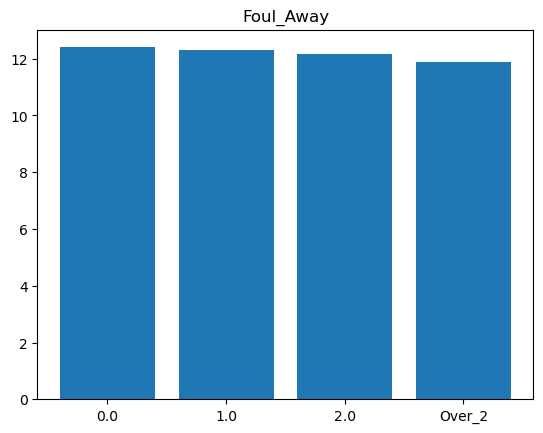

In [16]:



data=away_stats_v1[away_columns[1+i]]

plt.bar(away_stats_v1["goals.away"],data)
plt.title(away_columns[1+i])
print(away_columns[1+i])
i+=1

In [17]:
correlated_away_cols= ["Corner_Kicks_Away","Ball_Possession_Rate_Away",
                       "Red_Cards_Away","Total_Passes_Away","Total_Shot_Away",
                       "Total_Free_Shot_Away","1st_Quarter_Normal Goal_Away",
                       "2nd_Quarter_Normal Goal_Away",
                       "3rd_Quarter_Normal Goal_Away",
                       "4th_Quarter_Normal Goal_Away",
                       "5th_Quarter_Normal Goal_Away","6th_Quarter_Normal Goal_Away",
                       "1st_Quarter_Red Card_Away","2nd_Quarter_Red Card_Away","3rd_Quarter_Red Card_Away",
                       "6th_Quarter_Red Card_Away","Total_Shot_Opp_Given_Home","1st_Quarter_Conceived Goal_Home",
                       "2nd_Quarter_Conceived Goal_Home","3rd_Quarter_Conceived Goal_Home",
                       "4th_Quarter_Conceived Goal_Home","5th_Quarter_Conceived Goal_Home",
                       "6th_Quarter_Conceived Goal_Home","Rank_Name_Middle_Away",
                       "Rank_Name_first_2_3_Away","Rank_Name_first_4_6_Away","Rank_Name_last_Away",
                       "Rank_Name_last_2_3_Away","Rank_Name_title_Away","Fall_Prevent_comfort_Away",
                       "Rank_Name_Middle_Home","Rank_Name_first_2_3_Home","Rank_Name_first_4_6_Home",
                       "Rank_Name_last_Home","Rank_Name_last_2_3_Home",
                       "Rank_Name_title_Home","Rise_Need_3_point_for_chase_Home",
                       "Fall_Prevent_comfort_Home"
                       
                       
                       
                       
                       
                       
                       
                       
                       
    
]
len(correlated_away_cols)

38

In [18]:
home_stats_v1[correlated_home_cols]

,Corner_Kicks_Home,Ball_Possession_Rate_Home,Red_Cards_Home,Total_Passes_Home,Total_Shot_Home,Total_Free_Shot_Home,1st_Quarter_Normal Goal_Home,2nd_Quarter_Normal Goal_Home,3rd_Quarter_Normal Goal_Home,4th_Quarter_Normal Goal_Home,...,Rank_Name_title_Home,Rise_Need_1_point_needed_Home,Fall_Prevent_comfort_Home,Rank_Name_Middle_Away,Rank_Name_first_2_3_Away,Rank_Name_first_4_6_Away,Rank_Name_last_Away,Rank_Name_last_2_3_Away,Rank_Name_title_Away,Fall_Prevent_comfort_Away
0,4.495348,0.485727,0.036718,402.434807,11.570438,8.680342,0.120771,0.135921,0.156543,0.145837,...,0.024104,0.465593,0.235669,0.482266,0.136068,0.184151,0.037779,0.089672,0.070064,0.271013
1,4.643418,0.493848,0.036359,410.476361,11.915321,8.970240,0.127544,0.138992,0.163982,0.158162,...,0.035860,0.455414,0.239863,0.505817,0.112746,0.171616,0.048450,0.108839,0.052531,0.255318
2,4.789180,0.503738,0.032628,421.297067,12.338931,9.278354,0.132855,0.147472,0.174769,0.166139,...,0.050801,0.443591,0.254363,0.530738,0.093684,0.160919,0.060517,0.115516,0.038625,0.246926
3,5.043505,0.519874,0.031219,441.860598,13.042771,9.820300,0.147219,0.165388,0.195435,0.185023,...,0.082142,0.415887,0.293022,0.532030,0.074569,0.143111,0.081369,0.144116,0.024805,0.244185


In [19]:
manuel_features= {"home_features":correlated_home_cols,"away_features":correlated_away_cols}


#### AUTOMATED FEATURE SELECTION

##### ANOVA / Chi-Square

In [20]:
#We will treat goals as categoric variables. And we will conduct Anova and Chi-Square tests


In [21]:
#We are gonna create feature selector class for catorgic target
class feature_selector:
    
    def __init__(self,target,df):
        
        self.target_col=target #Target column
        self.df=df #Dataframe to be evaluated
        self.input_cols=[i for i in self.df.columns if i!= self.target_col] #Other columns except target column.
        
    
    def separate(self):
        #Booleans and other columns separeted, in order to assign propriate variance method.
        
        booleans=[i for i in self.input_cols if len(self.df[i].unique())==2 ]
        others  =[i for i in self.input_cols if len(self.df[i].unique())!=2 ]
        
        #Separated columns assigned to dictinory keys.
        return {"booleans":booleans,"others":others}
    
    def test(self,columns,mode="others",treshold=0.05):
        
        
        if mode=="others":
            #ANOVA for non binary columns
            test_out=f_classif(self.df[columns],self.df[self.target_col])
        
        else:
            #Chi2 for binary columns
            test_out=chi2(self.df[columns],self.df[self.target_col])
            
        #P values calculated by given statistical method and given columns are matched
        p_values=np.round(test_out[1],4)
        p_features=list(zip(p_values.tolist(),columns))
        #Columns bellow H0 p value treshold are selected.
        selected_features=[i[1] for i in p_features if i[0]<treshold]
        
        return selected_features
    
    def __call__(self,treshold=0.05): #Call method for class
        

        columns_dicts=self.separate()
        final_features=[]
        
        for i in columns_dicts.keys():
            
            final_features=final_features+self.test(columns_dicts[i],mode=i,treshold=treshold)
        
        return final_features
            
            
            
            
        
        
        
        
        

In [22]:
#Away goals correlated column selector is initialized.
away_selector=feature_selector("goals.away",away_stats)
away_selector

In [23]:
#Selected away columns
test_away_columns=away_selector()
test_away_columns

['Rank_Name_Middle_Away',
 'Rank_Name_first_2_3_Away',
 'Rank_Name_first_4_6_Away',
 'Rank_Name_last_Away',
 'Rank_Name_last_2_3_Away',
 'Rank_Name_title_Away',
 'Rise_Need_1_point_needed_Away',
 'Rise_Need_top_Away',
 'Fall_Prevent_bottom_Away',
 'Fall_Prevent_comfort_Away',
 'Rank_Name_Middle_Home',
 'Rank_Name_first_2_3_Home',
 'Rank_Name_first_4_6_Home',
 'Rank_Name_last_Home',
 'Rank_Name_last_2_3_Home',
 'Rank_Name_title_Home',
 'Rise_Need_3_point_for_chase_Home',
 'Rise_Need_top_Home',
 'Fall_Prevent_bottom_Home',
 'Fall_Prevent_comfort_Home',
 'Foul_Away',
 'Corner_Kicks_Away',
 'Offsides_Away',
 'Ball_Possession_Rate_Away',
 'Yellow_Cards_Away',
 'Red_Cards_Away',
 'Total_Passes_Away',
 'Accurate_Pass_Rate_Away',
 'Total_Shot_Away',
 'Shot_On_Goal_Rate_Away',
 'Inside_Box_Shot_Rate_Away',
 'Total_Free_Shot_Away',
 '1st_Quarter_Normal Goal_Away',
 '2nd_Quarter_Normal Goal_Away',
 '3rd_Quarter_Normal Goal_Away',
 '4th_Quarter_Normal Goal_Away',
 '5th_Quarter_Normal Goal_Away',
 

In [24]:
#Home goals correlated column selector is initialized.
home_selector=feature_selector("goals.home",home_stats)
test_home_columns=home_selector()
test_home_columns

['Rank_Name_Middle_Home',
 'Rank_Name_first_2_3_Home',
 'Rank_Name_first_4_6_Home',
 'Rank_Name_last_Home',
 'Rank_Name_last_2_3_Home',
 'Rank_Name_title_Home',
 'Rise_Need_1_point_needed_Home',
 'Rise_Need_top_Home',
 'Fall_Prevent_3_point_for_run_Home',
 'Fall_Prevent_bottom_Home',
 'Fall_Prevent_comfort_Home',
 'Rank_Name_Middle_Away',
 'Rank_Name_first_2_3_Away',
 'Rank_Name_first_4_6_Away',
 'Rank_Name_last_Away',
 'Rank_Name_last_2_3_Away',
 'Rank_Name_title_Away',
 'Rise_Need_3_point_for_catch_Away',
 'Rise_Need_top_Away',
 'Fall_Prevent_bottom_Away',
 'Fall_Prevent_comfort_Away',
 'Foul_Home',
 'Corner_Kicks_Home',
 'Offsides_Home',
 'Ball_Possession_Rate_Home',
 'Yellow_Cards_Home',
 'Red_Cards_Home',
 'Total_Passes_Home',
 'Accurate_Pass_Rate_Home',
 'Total_Shot_Home',
 'Shot_On_Goal_Rate_Home',
 'Inside_Box_Shot_Rate_Home',
 'Total_Free_Shot_Home',
 '1st_Quarter_Normal Goal_Home',
 '2nd_Quarter_Normal Goal_Home',
 '3rd_Quarter_Normal Goal_Home',
 '4th_Quarter_Normal Goal_Hom

In [25]:
#Selected home columns
test_features={"home_features":test_home_columns,"away_features":test_away_columns}

In [26]:
#All columns gathered
all_selections= {"manuel_selected":manuel_features,"test_selected":test_features}


In [27]:
with open("features.pkl","wb") as feat:
    
    pickle.dump(all_selections, feat)
    